In [2]:
%matplotlib inline
import pandas as pd
import pandas_datareader
import datetime
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.pylab import style
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels as sm

style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
stockFile = 'T10yr.csv'
stock = pd.read_csv(stockFile, index_col=0, parse_dates=[0])

stock.head(10)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,6.498,6.603,6.498,6.548,0,6.548
2000-01-04,6.530,6.548,6.485,6.485,0,6.485
2000-01-05,6.521,6.599,6.508,6.599,0,6.599
2000-01-06,6.558,6.585,6.540,6.549,0,6.549
2000-01-07,6.545,6.595,6.504,6.504,0,6.504
2000-01-10,6.540,6.567,6.536,6.558,0,6.558
2000-01-11,6.600,6.664,6.595,6.664,0,6.664
2000-01-12,6.659,6.696,6.645,6.696,0,6.696
2000-01-13,6.664,6.705,6.618,6.618,0,6.618


In [4]:
stock_week = stock['Close'].resample('W-MON').mean()
stock_train = stock_week['2000':'2015']


In [11]:
# stock_train.head(10)
stock_train.tail(10)

Date
2015-10-26    2.05340
2015-11-02    2.12620
2015-11-09    2.27400
2015-11-16    2.30640
2015-11-23    2.25800
2015-11-30    2.22950
2015-12-07    2.23260
2015-12-14    2.20980
2015-12-21    2.23780
2015-12-28    2.24275
Freq: W-MON, Name: Close, dtype: float64

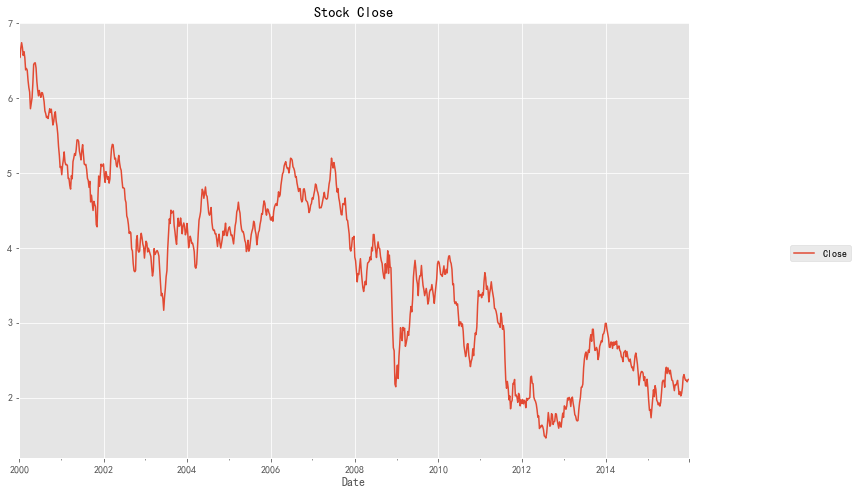

In [6]:
stock_train.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title("Stock Close")
sns.despine()

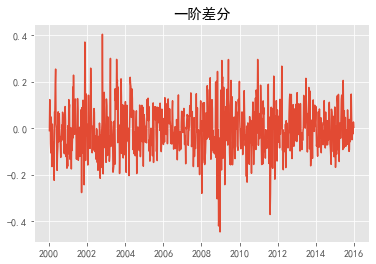

In [7]:
stock_diff = stock_train.diff()
stock_diff = stock_diff.dropna()

plt.figure()
plt.plot(stock_diff)
plt.title('一阶差分')
plt.show()

<ipython-input-8-10649e98f6ce>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


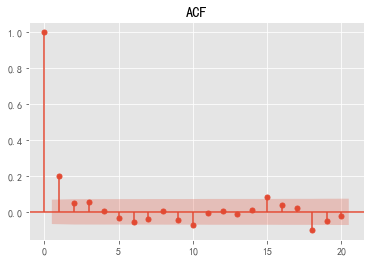

In [8]:
acf = plot_acf(stock_diff, lags=20)
plt.title("ACF")
acf.show()

<ipython-input-9-8c0c864cf7a6>:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pacf.show()


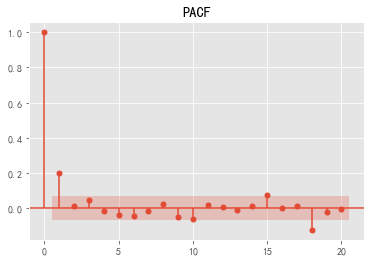

In [9]:
pacf = plot_pacf(stock_diff, lags=20)
plt.title("PACF")
pacf.show()

D:\Anaconda3\envs\pt38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Anaconda3\envs\pt38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA 

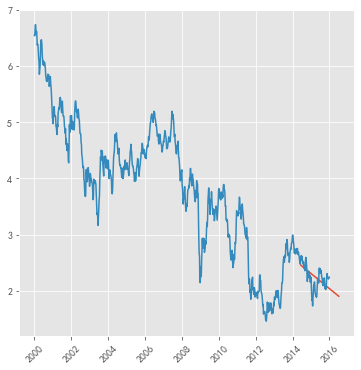

In [10]:
model = ARIMA(stock_train, order=(1, 1, 1),freq='W-MON')

result = model.fit()
pred = result.predict('20140609', '20160701',dynamic=True, typ='levels')

plt.figure(figsize=(6, 6))
plt.xticks(rotation=45)
plt.plot(pred)
plt.plot(stock_train)

In [15]:
# pred.tail(10)

stock_test = stock_week['2000':'2014']

In [16]:
stock_test.tail(10)

Date
2014-10-27    2.2484
2014-11-03    2.3190
2014-11-10    2.3476
2014-11-17    2.3452
2014-11-24    2.3266
2014-12-01    2.2265
2014-12-08    2.2786
2014-12-15    2.1572
2014-12-22    2.1522
2014-12-29    2.2445
Freq: W-MON, Name: Close, dtype: float64

D:\Anaconda3\envs\pt38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
D:\Anaconda3\envs\pt38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA 

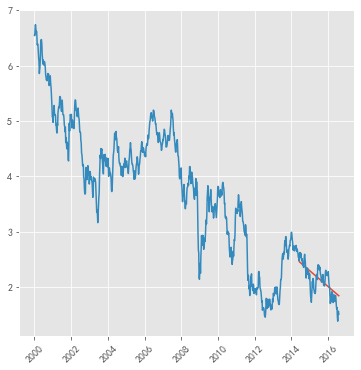

In [20]:
model1 = ARIMA(stock_test, order=(1, 1, 1),freq='W-MON')

result1 = model1.fit()
pred1 = result1.predict('20140609', '20160801',dynamic=True, typ='levels')

plt.figure(figsize=(6, 6))
plt.xticks(rotation=45)
plt.plot(pred1)
plt.plot(stock_week)

In [19]:
stock_week.tail(10)

Date
2016-05-30    1.85075
2016-06-06    1.78360
2016-06-13    1.67080
2016-06-20    1.61180
2016-06-27    1.63200
2016-07-04    1.47050
2016-07-11    1.38780
2016-07-18    1.53860
2016-07-25    1.56880
2016-08-01    1.51175
Freq: W-MON, Name: Close, dtype: float64

In [ ]:
model.plot

In [21]:
import statsmodels as sm
train_results = sm.tsa.arma_order_select_ic(stock_train, ic=['aic', 'bic'], trend='nc', max_ar=4, max_ma=4)
print('AIC', train_results.aic_min_order)
print('BIC', train_results.bic_min_order)



AttributeError: module 'statsmodels.tsa' has no attribute 'arma_order_select_ic'